In [17]:
import os
import re
from sys import getsizeof

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json

In [18]:
os.chdir("/home/eduardopach/Projects/SkateAI")

In [19]:
import const
import utils

In [16]:
list(const.VIDEO_SOURCES.values()).index("https://www.youtube.com/playlist?list=PLmxvVi4Ors7aqc726ngHq1SwTrBGPjCSN")

10

In [8]:
utils.get_videos_url(const.VIDEO_SOURCES["BATB 1"])

{'Mike Mo Capaldi Vs Furby: BATB1 - Round 1': 'https://www.youtube.com/watch?v=eGTsIL-xJB8',
 'Arto Saari Vs Chico Brenes: BATB1 - Round 1': 'https://www.youtube.com/watch?v=duSN0KHFK44',
 'Billy Marks Vs Danny Supa: BATB1 - Round 1': 'https://www.youtube.com/watch?v=POQaDcvhpTs',
 'Brandon Biebel Vs Nick McLouth: BATB1 - Round 1': 'https://www.youtube.com/watch?v=3lqNen-Qccw',
 'Steve Berra Vs Chris Roberts: BATB1 - Round 1': 'https://www.youtube.com/watch?v=fwZ7sUXKSBo',
 'Clint Peterson Vs Paul Shier: BATB1 - Round 1': 'https://www.youtube.com/watch?v=QC1aI707y3E',
 'Daniel Castillo Vs Andrew Reynolds: BATB1 - Round 1': 'https://www.youtube.com/watch?v=P-a7pyXL12M',
 'Erik Ellington Vs Danny Montoya: BATB1 - Round 1': 'https://www.youtube.com/watch?v=WwjZzIuJLwo',
 'Sean Malto Vs Donovan Strain: BATB1 - Round 1': 'https://www.youtube.com/watch?v=wGSotlk4uQc',
 'Eric Koston Vs Rob Dyrdek: BATB1 - Round 1': 'https://www.youtube.com/watch?v=lWeiGaQQV2g',
 'Jeron Wilson Vs Mike Carroll:

In [79]:
df = pd.read_csv("data/metadata/metadata.csv")

In [80]:
df

,video_path,video_title,video_url,video_source,trick_interval,trick_name,body_rotation_type,body_rotation_number,board_rotation_type,board_rotation_number,flip_type,flip_number,landed,stance
0,data/videos/00001.mp4,BATB 11 | Championship Battle: Luan Oliveira v...,https://www.youtube.com/watch?v=sDLIf7JVNnM,BATB 11,"[149.6, 151.9]",treflip,0,0,1,2,1,1,True,0
1,data/videos/00002.mp4,BATB 11 | Championship Battle: Luan Oliveira v...,https://www.youtube.com/watch?v=sDLIf7JVNnM,BATB 11,"[154.2, 155.1]",treflip,0,0,1,2,1,1,True,0
2,data/videos/00003.mp4,BATB 11 | Championship Battle: Luan Oliveira v...,https://www.youtube.com/watch?v=sDLIf7JVNnM,BATB 11,"[159.4, 161.2]",kickflip,0,0,0,0,1,1,True,3
3,data/videos/00004.mp4,BATB 11 | Championship Battle: Luan Oliveira v...,https://www.youtube.com/watch?v=sDLIf7JVNnM,BATB 11,"[163.8, 166.0]",kickflip,0,0,0,0,1,1,True,3
4,data/videos/00005.mp4,BATB 11 | 3rd Place Battle: Tom Asta vs. Sewa ...,https://www.youtube.com/watch?v=A8z4OJByT-w,BATB 11,"[89.9, 91.5]",360 shovit,0,0,1,2,0,0,True,0
5,data/videos/00006.mp4,BATB 11 | 3rd Place Battle: Tom Asta vs. Sewa ...,https://www.youtube.com/watch?v=A8z4OJByT-w,BATB 11,"[94.7, 96.4]",360 shovit,0,0,1,2,0,0,True,0
6,data/videos/00007.mp4,BATB 11 | 3rd Place Battle: Tom Asta vs. Sewa ...,https://www.youtube.com/watch?v=A8z4OJByT-w,BATB 11,"[99.2, 101.2]",fs shovit,0,0,2,1,0,0,True,0
7,data/videos/00008.mp4,BATB 11 | 3rd Place Battle: Tom Asta vs. Sewa ...,https://www.youtube.com/watch?v=A8z4OJByT-w,BATB 11,"[103.3, 105.2]",fs shovit,0,0,2,1,0,0,True,0


In [78]:
df.loc[df.video_path=="data/videos/00001.mp4", ["flip_type", "flip_number"]].to_numpy()

array([['kickflip', 1]], dtype=object)

In [26]:
paths = df["video_path"]

In [69]:
all_videos = []
for path in paths:
    video_reader = cv2.VideoCapture(path)
    frames = []
    while True:
        success, frame = video_reader.read()
        if not success:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame)
    video_reader.release()
    all_videos.append(frames)
    break

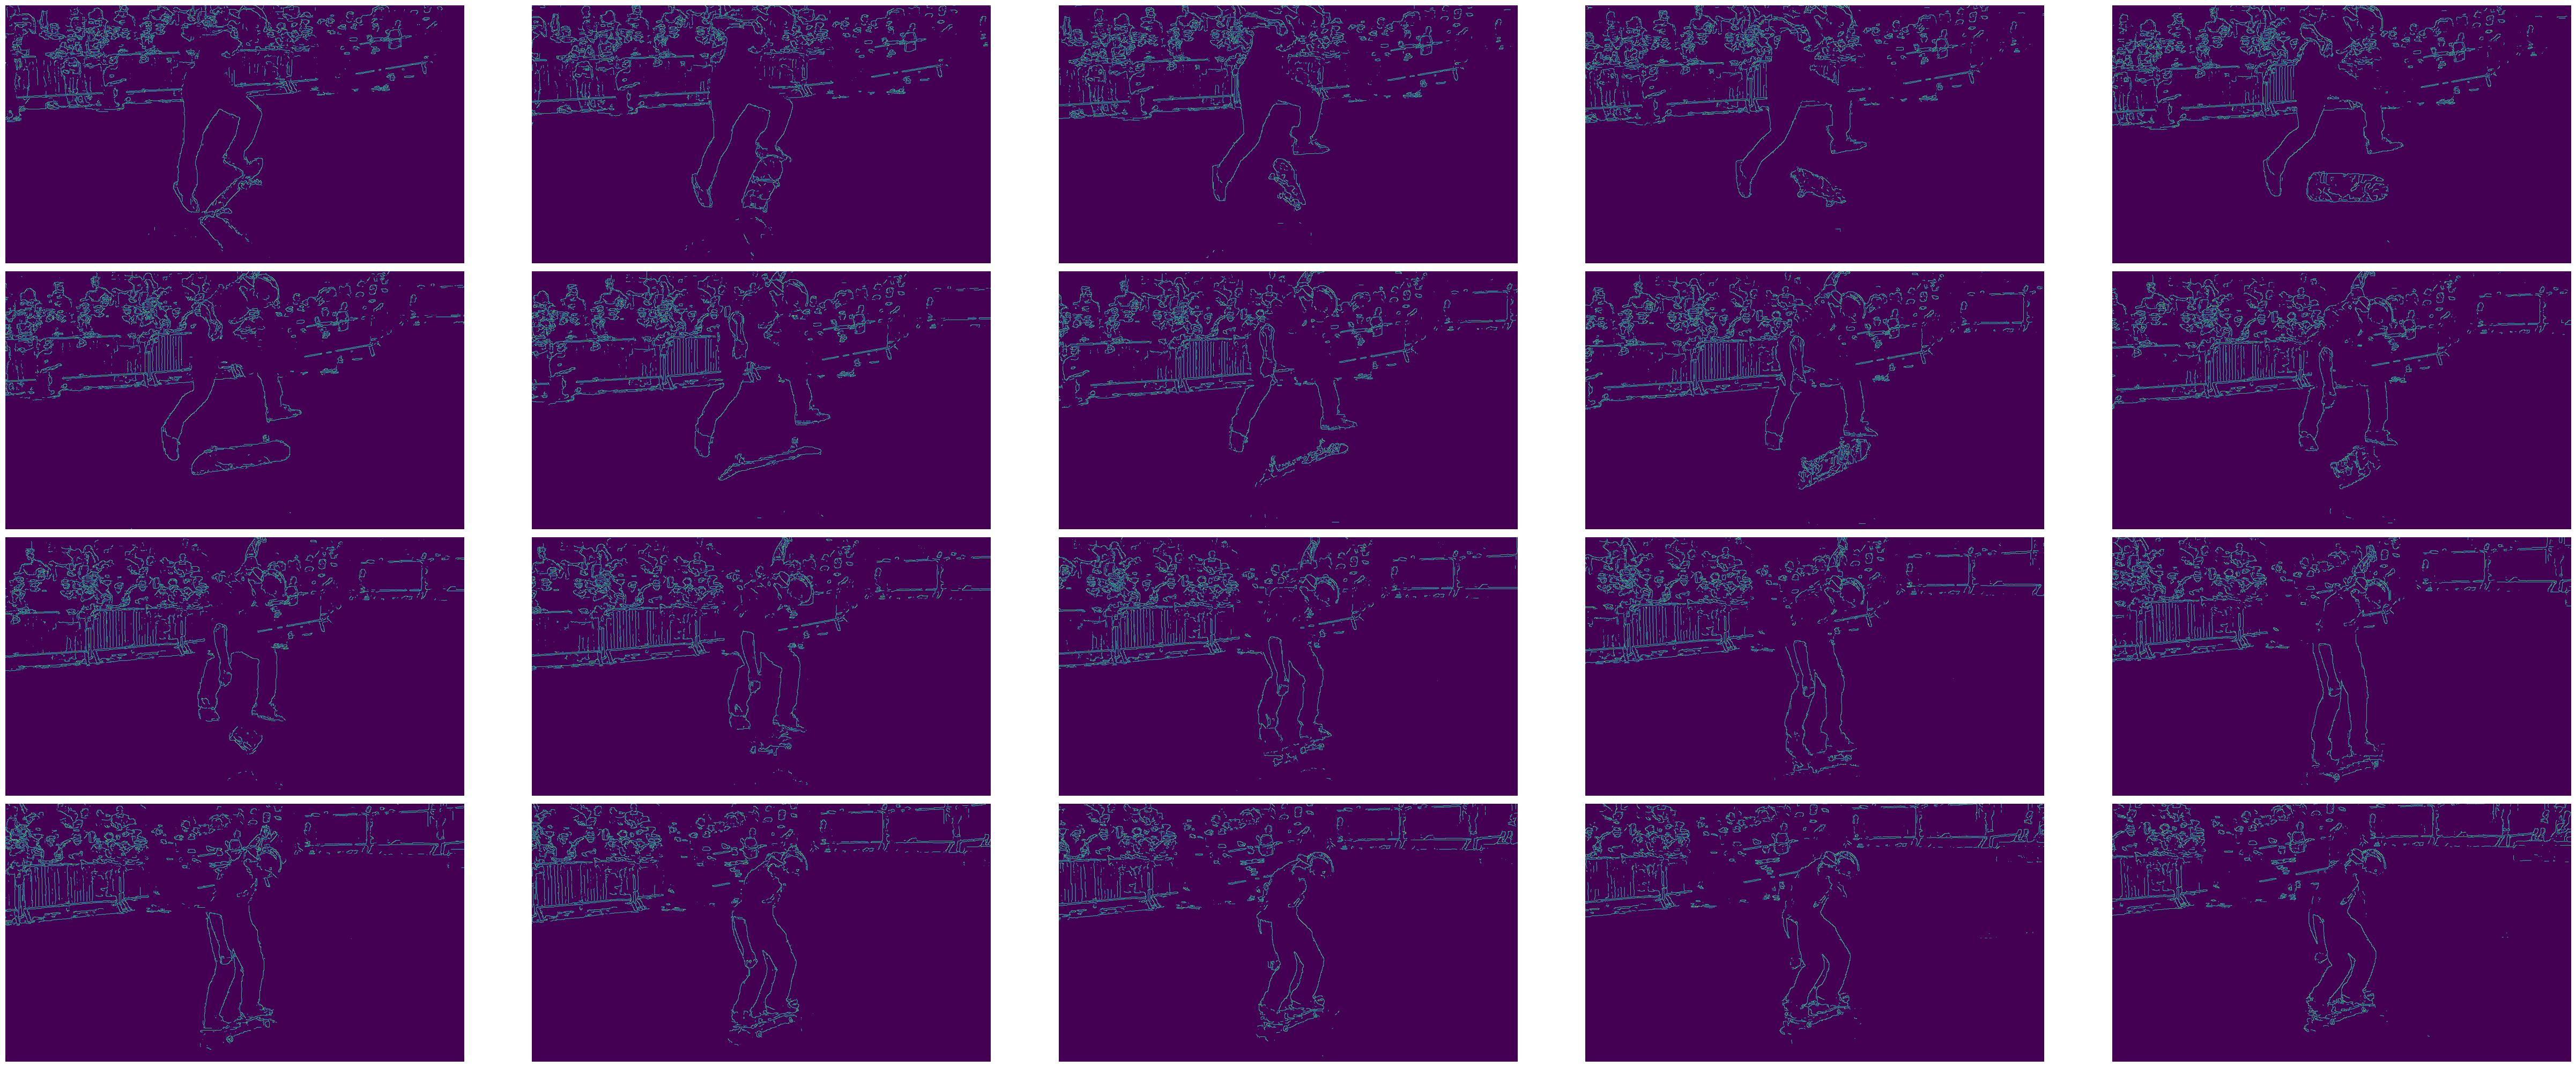

In [75]:
f = 20
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(50, 20))
for idx, ax in enumerate(axes.flatten()):
    ax.imshow(cv2.Canny(frames[idx+20], 50, 50))
    ax.axis('off')
plt.tight_layout()

# Tricks Dictionary

In [54]:
TRICKS_DICT = {
    "kickflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "double kickflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "triple kickflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "kickflip",
        "flip_number": 3
    },
    "fs 180 kickflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "bs 180 kickflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "fs 360 kickflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "bs 360 kickflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "fs 180 double kickflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "bs 180 double kickflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "fs 360 double kickflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "bs 360 double kickflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "heelflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "double heelflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "triple heelflip":{
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "none",
        "board_rotation_number": 0,
        "flip_type": "heelflip",
        "flip_number": 3
    },
    "fs 180 heelflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "bs 180 heelflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "fs 360 heelflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "bs 360 heelflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "fs 180 double heelflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "bs 180 double heelflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "fs 360 double heelflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "bs 360 double heelflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "treflip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "tre double flip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "hardflip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "360 hardflip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "varial flip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "varial double flip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "hard double flip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "bigflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "bigspin double flip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 2
    },
    "biggerflip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "gazzele flip": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "bigspin hardflip": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "kickflip",
        "flip_number": 1
    },
    "laserflip": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "inward heel": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "varial heel": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "varial double heel": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "heelflip",
        "flip_number": 2
    },
    "360 inward heel": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "bigspin inward heel": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "bigheel": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "heelflip",
        "flip_number": 1
    },
    "fs shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 360 shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 540 shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "frontside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "none",
        "flip_number": 0
    },
    "360 shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "540 shovit": {
        "body_rotation_type": "none",
        "body_rotation_number": 0,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs bigspin": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs biggerspin": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs bigspin": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs biggerspin": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs gazzele": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs 180": {
        "body_rotation_type": "backside",
        "body_rotation_number": 1,
        "board_rotation_type": "backside",
        "board_rotation_number": 1,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs 360": {
        "body_rotation_type": "backside",
        "body_rotation_number": 2,
        "board_rotation_type": "backside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "bs 540": {
        "body_rotation_type": "backside",
        "body_rotation_number": 3,
        "board_rotation_type": "backside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 180": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 1,
        "board_rotation_type": "frontside",
        "board_rotation_number": 1,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 360": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 2,
        "board_rotation_type": "frontside",
        "board_rotation_number": 2,
        "flip_type": "none",
        "flip_number": 0
    },
    "fs 540": {
        "body_rotation_type": "frontside",
        "body_rotation_number": 3,
        "board_rotation_type": "frontside",
        "board_rotation_number": 3,
        "flip_type": "none",
        "flip_number": 0
    }
}

In [58]:
with open("data/TRICK_NAMES.json", 'w') as f:
    json.dump(TRICKS_DICT, f)

In [53]:
for key, val in TRICKS_DICT.items():
    if val["body_rotation_type"]=="none" and val["body_rotation_number"]!=0:
        print(f"Wrong Body Rotation Type or Wrong Body Rotation Number at {key}")

    if val["body_rotation_type"]!="none" and val["body_rotation_number"]==0:
        print(f"Wrong Body Rotation Type or Wrong Body Rotation Number at {key}")

    if val["board_rotation_type"]=="none" and val["board_rotation_number"]!=0:
        print(f"Wrong Shov Rotation Type or Wrong Shov Rotation Number at {key}")

    if val["board_rotation_type"]!="none" and val["board_rotation_number"]==0:
        print(f"Wrong Shov Rotation Type or Wrong Shov Rotation Number at {key}")

    if re.match("kickflip|flip", key) and (val["flip_type"]!='kickflip' or val["flip_number"]==0):
        print(f"Wrong flip type. Name is {key} flip type is {val['flip_type']} and flip number is {val['flip_number']}")

    if re.match(".*heel", key) and (val["flip_type"]!='heelflip' or val["flip_number"]==0):
        print(f"Wrong flip type. Name is {key} flip type is {val['flip_type']} and flip number is {val['flip_number']}")

    if 'big' in key and val["body_rotation_type"]!=val["board_rotation_type"]:
        print(f"Either one of body or shov rotation type is wrong at {key}")
    
    if 'big' in key and (val["body_rotation_number"]<1 or val["board_rotation_number"]<=1):
        print(f"Either one of body or shov rotation type is wrong at {key}")

    if 'gazzele' in key and val["body_rotation_type"]!=val["board_rotation_type"]:
        print(f"Either one of body or shov rotation type is wrong at {key}")

    if 'gazzele' in key and (val["body_rotation_number"]<2 or val["board_rotation_number"]<=2):
        print(f"Either one of body or shov rotation type is wrong at {key}")

    if ('double' in key or 'triple' in key) and (val["flip_number"] not in [2,3] or val["flip_type"]=='none'):
        print(f"Double error in {key}")

    if val['flip_type'] not in ["heelflip", "kickflip", "none"]:
        print(f"Flip type error at {key}")

    if val['board_rotation_type'] not in ["frontside", "backside", "none"] or val["body_rotation_type"] not in ['none', 'frontside', 'backside']:
        print(f"Body or rotation type error at {key}")
    
    if val["body_rotation_type"]!="none" and val["board_rotation_type"]!=val["body_rotation_type"] and True:
        pass

In [14]:
names = []
other = []
for i in range(15):
    names.append(f"img_{i:05d}.jpeg")
    other.append(f"img_{i}.jpeg")

# Pytorch Tests

In [1]:
import torch.nn as nn
import torch
from torchvision import models

In [2]:
model = models.resnet18(models.resnet.ResNet18_Weights)

c:\Users\Eduardo Pacheco\Desktop\Arquivos\Personal\SkateAI\skate\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
c:\Users\Eduardo Pacheco\Desktop\Arquivos\Personal\SkateAI\skate\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Eduardo Pacheco/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:16<00:00, 2.86MB/s]


In [61]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [12]:
vgg = models.vgg19(weights=models.vgg.VGG19_BN_Weights)

c:\Users\Eduardo Pacheco\Desktop\Arquivos\Personal\SkateAI\skate\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Eduardo Pacheco/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [04:30<00:00, 2.13MB/s] 


In [55]:
T1 = torch.rand(1,2)
T2 = torch.rand(1,3)

In [56]:
T1

tensor([[0.6336, 0.2627]])

In [57]:
T2.unsqueeze

tensor([[0.2902, 0.6897, 0.4900]])

In [69]:
lstm = nn.LSTM(2, 12, 2)

In [70]:
x = torch.rand(10, 1, 2)

In [71]:
x

tensor([[[0.4231, 0.7181]],

        [[0.7402, 0.9705]],

        [[0.0160, 0.8351]],

        [[0.0794, 0.4413]],

        [[0.7035, 0.7420]],

        [[0.7837, 0.9334]],

        [[0.6926, 0.3781]],

        [[0.2436, 0.0696]],

        [[0.8019, 0.7812]],

        [[0.2290, 0.8376]]])

In [72]:
output, (h, c) = lstm(x)

In [83]:
output

tensor([[[ 0.0690, -0.0067,  0.0473, -0.0055,  0.0661,  0.0202,  0.0954,
           0.0172, -0.1011,  0.0712,  0.0240, -0.0438]],

        [[ 0.0856,  0.0037,  0.0716,  0.0011,  0.0906,  0.0241,  0.1151,
           0.0240, -0.1464,  0.0808,  0.0307, -0.0861]],

        [[ 0.0935,  0.0109,  0.0786,  0.0066,  0.0991,  0.0226,  0.1131,
           0.0266, -0.1579,  0.0803,  0.0333, -0.1163]],

        [[ 0.0965,  0.0182,  0.0782,  0.0108,  0.1004,  0.0219,  0.1049,
           0.0279, -0.1584,  0.0815,  0.0346, -0.1332]],

        [[ 0.0928,  0.0255,  0.0788,  0.0163,  0.0985,  0.0220,  0.1000,
           0.0291, -0.1652,  0.0793,  0.0343, -0.1380]],

        [[ 0.0893,  0.0297,  0.0797,  0.0205,  0.0970,  0.0219,  0.0982,
           0.0295, -0.1716,  0.0762,  0.0345, -0.1389]],

        [[ 0.0878,  0.0342,  0.0781,  0.0221,  0.0965,  0.0230,  0.0935,
           0.0301, -0.1725,  0.0778,  0.0367, -0.1380]],

        [[ 0.0909,  0.0360,  0.0730,  0.0218,  0.0967,  0.0243,  0.0872,
          

In [87]:
output.shape

torch.Size([10, 1, 12])

In [88]:
output[:,-1].shape

torch.Size([10, 12])

# OpenCV MP4 to images test

In [17]:
import cv2

In [22]:
cap = cv2.VideoCapture("data/videos/BATB_11__Championship_Battle_Luan_Oliveira_vs_Chris_Joslin/nollie_kickflip_landed_1.mp4")
i = 1
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f"imgs_video/imgs_{i:05d}.jpeg", frame)
    i+=1

# Trying to use SceneDetect

In [1]:
from __future__ import annotations

import os

import boto3
from pytube import YouTube
from dotenv import load_dotenv
from scenedetect import open_video, ContentDetector, SceneManager, StatsManager, split_video_ffmpeg, FrameTimecode

load_dotenv()

/home/eduardo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
def download_video_from_s3(filepath_s3: str, filepath_local: str) -> None:
    s3 = boto3.resource('s3')
    try:
        dir_name = os.path.dirname(filepath_local)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        s3.Bucket(os.environ["S3_BUCKET"]).download_file(filepath_s3, filepath_local)
        print("Successfully downloaded the file from s3")
    except Exception as e:
        print("Some error occured while downloading the file from s3", e)


In [22]:
filepath_s3 = "Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1.mp4"
title = "Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1"
filepath_local = f"video/{filepath_s3}"

In [4]:
download_video_from_s3(filepath_s3, filepath_local)

Successfully downloaded the file from s3


In [6]:
def find_scenes(filepath: str) -> list[tuple[FrameTimecode, FrameTimecode]]:
    video = open_video(filepath)
    stats_manager = StatsManager()
    scene_manager = SceneManager(stats_manager)
    scene_manager.add_detector(ContentDetector(threshold=35))
    scene_manager.detect_scenes(video)

    return scene_manager.get_scene_list()

In [7]:
scenes = find_scenes(filepath_local)

In [21]:
import pandas as pd
def scenes_to_dataframe(scenes: list[tuple[FrameTimecode, FrameTimecode]], **kwargs) -> pd.DataFrame:
    """Convert a list of scenes to a dataframe

    Parameters
    ----------
    scenes : list[tuple[FrameTimecode, FrameTimecode]]
        List of scenes

    Returns
    -------
    pd.DataFrame
        Dataframe with the scenes
    """
    df = pd.DataFrame(
        data=scenes, 
        columns=["start", "end"]
    )
    df["start"] = df["start"].apply(lambda x: x.get_seconds())
    df["end"] = df["end"].apply(lambda x: x.get_seconds())
    df["duration"] = df["end"] - df["start"]
    if kwargs:
        for key, val in kwargs.items():
            df[key] = val
    return df

In [23]:
df = scenes_to_dataframe(scenes, title=title)

In [19]:
split_video_ffmpeg(filepath_local, scenes, output_file_template=f"scene/$SCENE_NUMBER.mp4", show_progress=True)

100%|██████████| 5884/5884 [00:37<00:00, 156.26frame/s]


0

In [26]:
from glob import glob
scene_files = sorted(glob("scene/*.mp4"))

In [28]:
df["files"] = scene_files

In [29]:
df

,start,end,duration,title,files
0,0.000000,1.201200,1.201200,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/001.mp4
1,1.201200,1.768433,0.567233,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/002.mp4
2,1.768433,6.606600,4.838167,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/003.mp4
3,6.606600,8.675333,2.068733,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/004.mp4
4,8.675333,14.147467,5.472133,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/005.mp4
5,14.147467,16.349667,2.202200,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/006.mp4
6,16.349667,19.853167,3.503500,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/007.mp4
7,19.853167,27.560867,7.707700,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/008.mp4
8,27.560867,40.006633,12.445767,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/009.mp4
9,40.006633,44.544500,4.537867,Mike_Mo_Capaldi_Vs_Furby_BATB1__Round_1,scene/010.mp4


In [ ]:
# Split the video into clips
start_time = 0
for i, scene in enumerate(scenes):
    end_time = scene[-1].get_timecode()
    os.system(f'ffmpeg -i {filepath_local} -ss {start_time} -to {end_time} -c copy scenes/clip{i}.mp4')
    start_time = end_time